In [ ]:
pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.4 MB/s eta 0:00:00


In [ ]:
from PyPDF2 import PdfReader
pdf = PdfReader("/content/The Pillars of the Earth.pdf")
print(len(pdf.pages))
def extract_text_from_pdf(file_path, start_page, end_page):
    text = ""
    for page_number in range(start_page, end_page + 1):  # Python uses 0-indexing
        text += pdf.pages[page_number].extract_text()
    return text
    


1119


In [ ]:

# Specify the page ranges for each chapter
chapter_page_ranges = [(8, 316), (317, 497), (498, 678), (679, 878), (879, 1036), (1037, 1118)]  # replace with actual page ranges

# Extract the text for each chapter
chapters = [extract_text_from_pdf("/content/The Pillars of the Earth.pdf", start, end) for start, end in chapter_page_ranges]

# Combine the texts of all the chapters
combined_text = ' '.join(chapters)




In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

vectorizer = TfidfVectorizer()

dfs = []

for i, chapter in enumerate(chapters):
    word_tokens = word_tokenize(chapter.lower())  # Convert to lower case before tokenizing
    filtered_text = [ps.stem(w) for w in word_tokens if w not in stop_words and w.isalpha()]
    filtered_text_str = ' '.join(filtered_text)
    X = vectorizer.fit_transform([filtered_text_str])
    df = pd.DataFrame(list(zip(vectorizer.get_feature_names_out(), X.toarray()[0])), columns=['Word', 'TF-IDF'])
    df = df.sort_values('TF-IDF', ascending=False)
    dfs.append(df)
    df.to_csv(f'tfidf_scores_chapter_{i+1}.csv', index=False)

# # Perform summarization for each chapter
# for i, chapter_text in enumerate(chapters):
#     # Tokenize the chapter text into sentences
#     sentences = sent_tokenize(chapter_text)

#     # Initialize a list to store the processed sentences
#     processed_sentences = []

#     # Process each sentence
#     for sentence in sentences:
#         # Tokenize the sentence
#         words = nltk.word_tokenize(sentence)
#         # Remove stop words and perform stemming
#         filtered_words = [stemmer.stem(word.lower()) for word in words if word.lower() not in stop_words]
#         # Add the processed sentence to the list
#         processed_sentences.append(' '.join(filtered_words))

#     # Generate the summary for the chapter
#     summary = ' '.join(processed_sentences)

#     # Print the summary for the chapter
#     print(f"Summary for Part {i+1}:")
#     print(summary)
#     print("\n")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


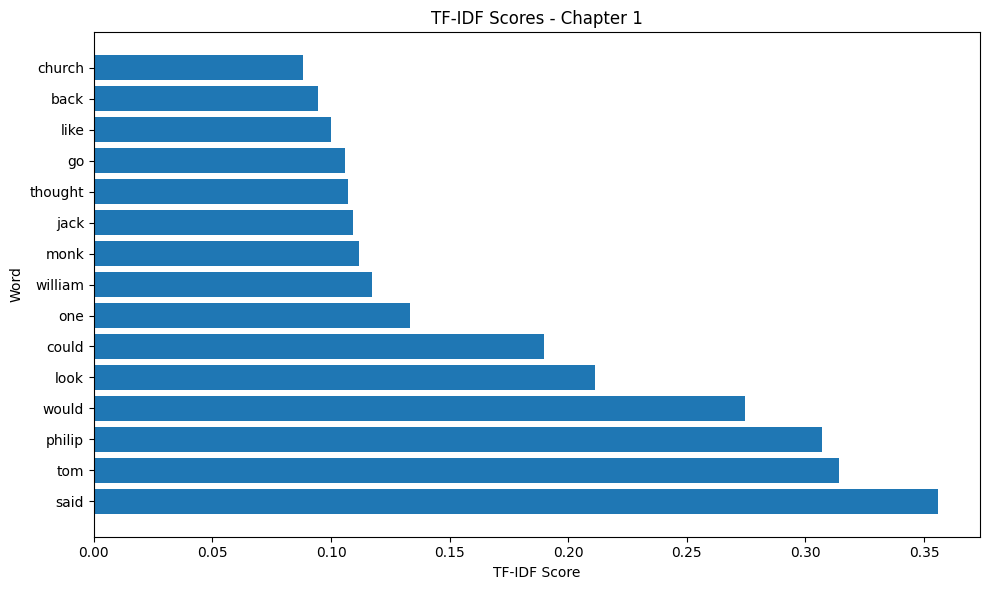

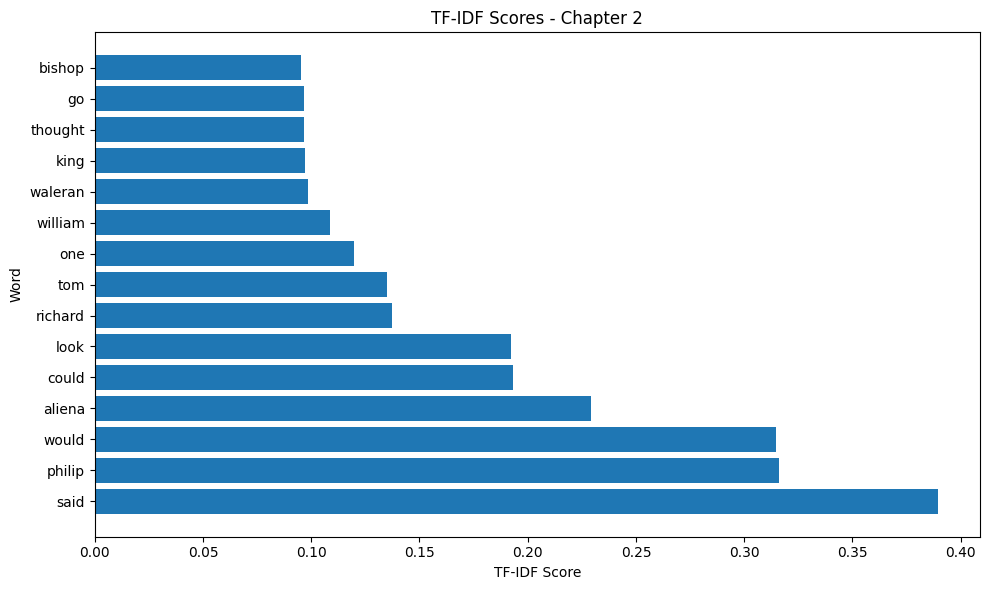

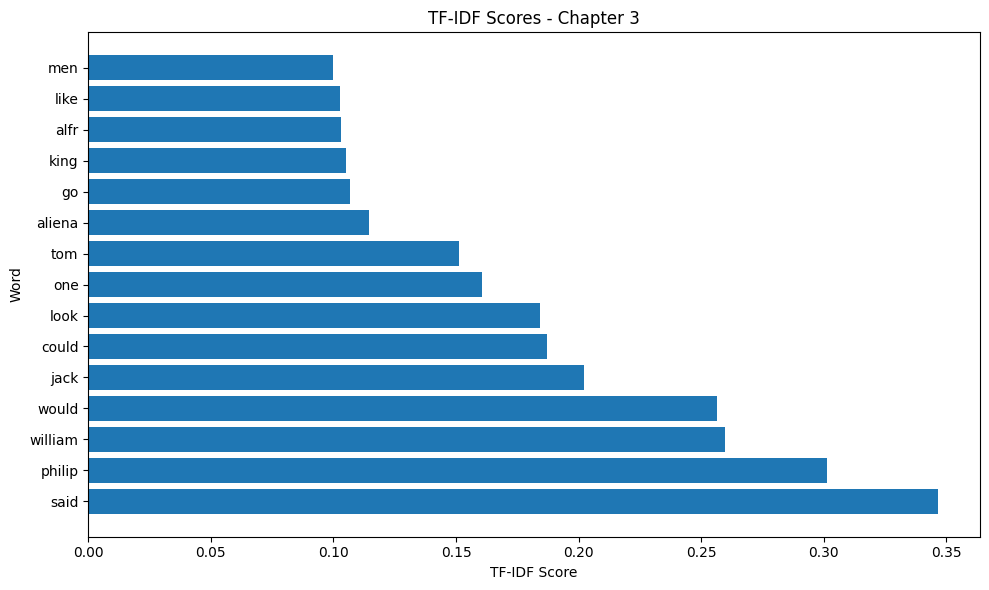

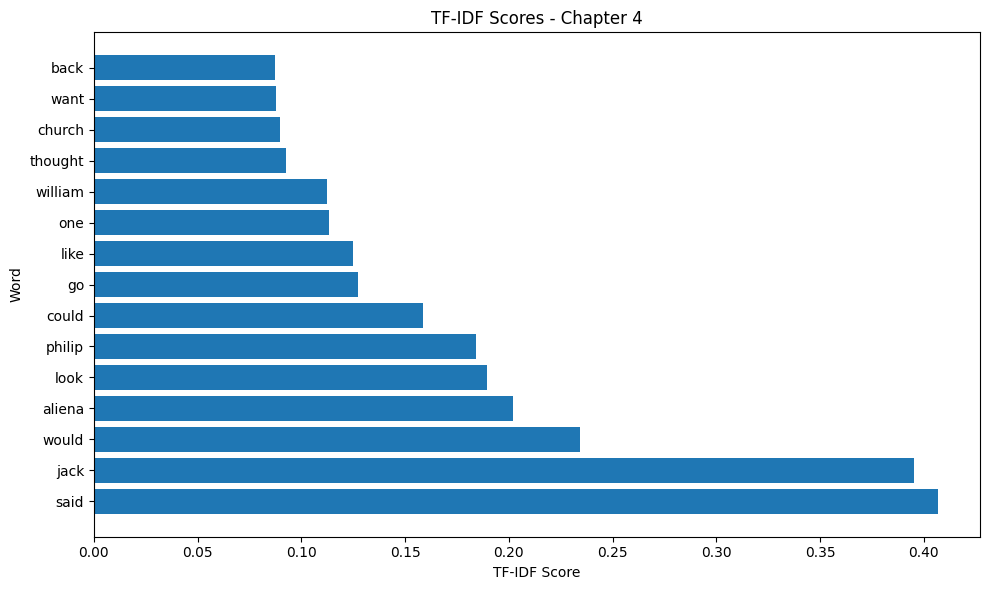

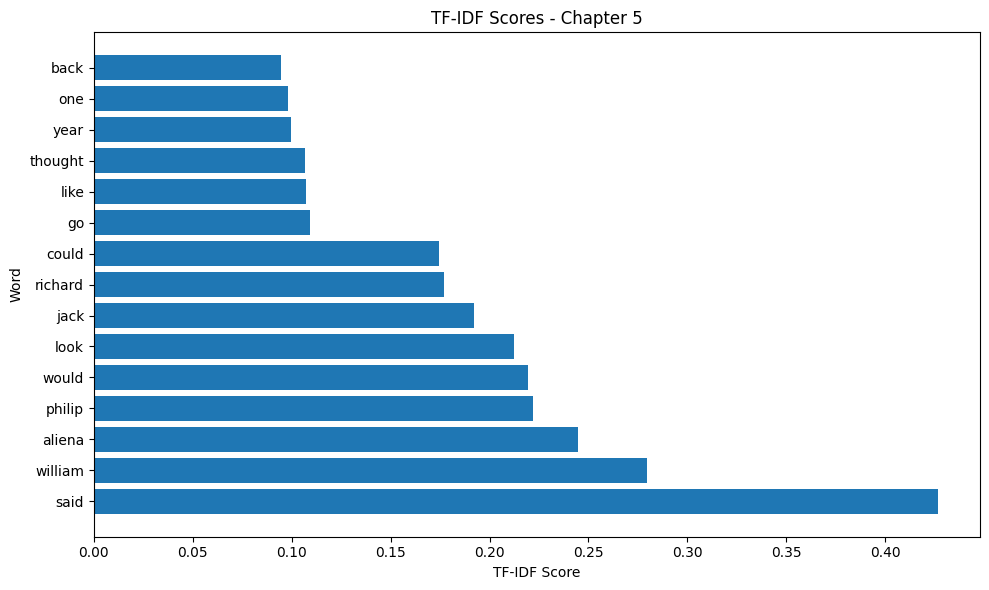

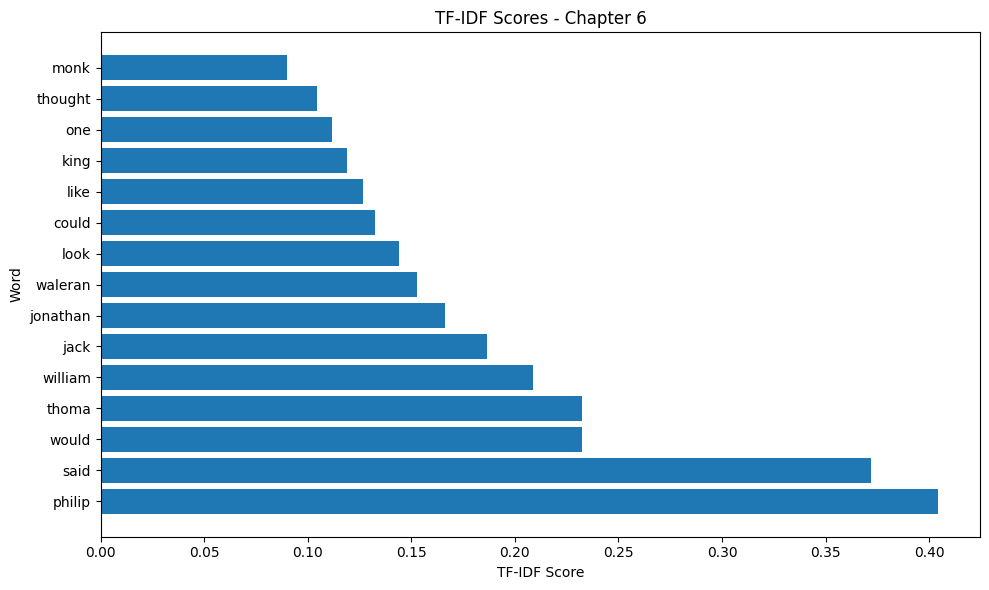

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# traverse each chapter's TF-IDF scores and visualize them
for i in range(1, 7):  
    # read TF-IDF table from CVS files
    df = pd.read_csv(f'tfidf_scores_chapter_{i}.csv')

    # keep top 15 words
    df = df.head(15)

    # visualize TF-IDF tables
    plt.figure(figsize=(10, 6))
    plt.barh(df['Word'], df['TF-IDF'])
    plt.title(f'TF-IDF Scores - Chapter {i}')
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Word')
    plt.tight_layout()
    plt.show()


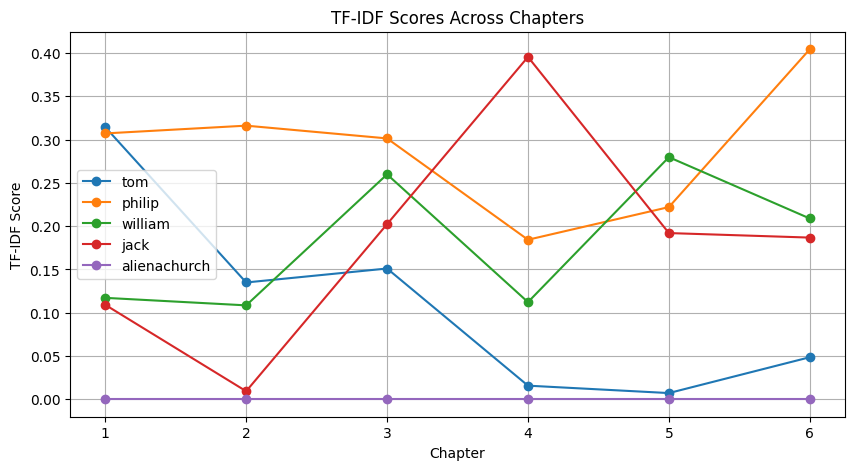

In [ ]:
import matplotlib.pyplot as plt

# List of words you want to analyze
words = ['tom', 'philip', 'william', 'jack', 'aliena' 'church']  # Replace with your words

plt.figure(figsize=(10, 5))

for word in words:
    scores = []
    for df in dfs:
        if word in df['Word'].values:
            score = df.loc[df['Word'] == word, 'TF-IDF'].values[0]
        else:
            score = 0
        scores.append(score)
        
    plt.plot(range(1, len(dfs) + 1), scores, marker='o', label=word)

plt.xlabel('Chapter')
plt.ylabel('TF-IDF Score')
plt.title('TF-IDF Scores Across Chapters')
plt.xticks(range(1, len(dfs) + 1))
plt.legend()
plt.grid()
plt.show()


             tom          philip      william         jack        aliena  \
0     philip:129       prior:208  waleran:101   alfred:155   richard:120   
1    builder:100     waleran:174    walter:93   philip:136      jack:119   
2     alfred:100        jack:136  hamleigh:93   aliena:119    william:60   
3        jack:94         tom:129   richard:77       tom:94       felt:50   
4       ellen:68         felt:89    philip:74    martha:68     philip:44   
5        baby:47          man:78      felt:60    mother:54     turned:40   
6         man:44       bishop:77    aliena:60      know:47     alfred:38   
7      martha:41         king:76       men:58      felt:45      ellen:37   
8       agnes:38      william:74      earl:58    turned:42     father:34   
9      turned:36     remigius:71      king:57        go:40       girl:33   
10   realized:35        monks:69       man:50       way:40   realized:32   
11   jonathan:35        right:69    turned:48    moment:36       knew:32   
12     mothe

<ipython-input-24-8bc44260d4f0>:84: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds')
<ipython-input-24-8bc44260d4f0>:107: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Number of Common Words')


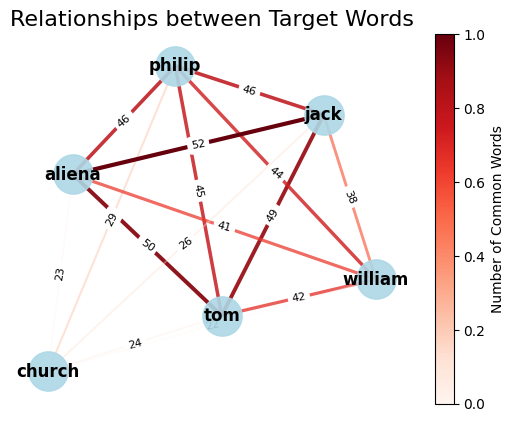

In [ ]:
#manually set window size
from nltk.corpus import stopwords
import pandas as pd
from collections import Counter
import nltk

# Add window_size as an input parameter to the function
def common_words_around_target(text, target_word, window_size):
    words = nltk.word_tokenize(text.lower())
    index_target_words = [i for i, word in enumerate(words) if word == target_word]

    nearby_words = []
    for index in index_target_words:
        for i in range(max(index - window_size, 0), min(index + window_size + 1, len(words))):
            if words[i] != target_word and words[i] not in stop_words and words[i].isalpha():
                nearby_words.append(words[i])

    counter = Counter(nearby_words)
    return counter.most_common(100)  # Return a larger number at first

target_words = ['tom', 'philip', 'william', 'jack', 'aliena' ,'church']
results = {}

# Specify window_size when you call the function for each target word
window_size = 10

# Getting the common words for each target word
for target_word in target_words:
    common_words = common_words_around_target(combined_text, target_word, window_size)
    results[target_word] = dict(common_words)

# Now we find the intersection of the common words for all target words
intersecting_words = set.intersection(*(set(val.keys()) for val in results.values()))

# Removing the intersecting words from the results
for target_word in results:
    for word in intersecting_words:
        results[target_word].pop(word, None)

# Creating the DataFrame with top 20 words for each character
df_results = pd.DataFrame({key: [f'{word}:{freq}' for word, freq in list(val.items())[:20]] for key, val in results.items()})


print(df_results)

import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes for target words
G.add_nodes_from(target_words)

# Add edges between target words based on shared common words
for i in range(len(target_words)):
    for j in range(i + 1, len(target_words)):
        target1 = target_words[i]
        target2 = target_words[j]
        common_words = set(results[target1].keys()) & set(results[target2].keys())
        weight = len(common_words)  # Weight of the edge based on the number of common words
        if weight > 0:
            G.add_edge(target1, target2, weight=weight)

# Set the layout for the graph
pos = nx.spring_layout(G)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=800, alpha=0.9)

# Draw edges with varying widths and colors based on the weight
edge_widths = [data['weight'] for _, _, data in G.edges(data=True)]
edge_colors = [data['weight'] for _, _, data in G.edges(data=True)]

# Normalize the edge widths and colors
max_width = max(edge_widths)
min_width = min(edge_widths)
normalized_widths = [(width - min_width) / (max_width - min_width) for width in edge_widths]

max_color = max(edge_colors)
min_color = min(edge_colors)
normalized_colors = [(color - min_color) / (max_color - min_color) for color in edge_colors]

cmap = plt.cm.get_cmap('Reds')

for (u, v, data), width, color in zip(G.edges(data=True), normalized_widths, normalized_colors):
    weight = data['weight']
    alpha = 0.3 + (0.7 * width)  # Adjust the transparency based on the width
    line_width = 1.0 + (2.0 * width)  # Adjust the line thickness based on the width
    edge_color = cmap(color)
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=line_width, edge_color=edge_color, alpha=alpha)

    # Add edge labels
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): weight},
                                 font_size=8, font_color='black')

# Draw labels for nodes
node_labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_color='black', font_weight='bold')

# Set the title
plt.title('Relationships between Target Words', fontsize=16)

# Create a colorbar for the edge weights
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
plt.colorbar(sm, label='Number of Common Words')

# Show the plot
plt.axis('off')
plt.show()






In [ ]:

import nltk
from nltk.corpus import stopwords
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

sentences = nltk.sent_tokenize(combined_text)

stop_words = set(stopwords.words('english'))
tokenized_sentences = [nltk.word_tokenize(sentence.lower()) for sentence in sentences]
filtered_sentences = [[word for word in sentence if word.isalpha() and word not in stop_words] for sentence in tokenized_sentences]

target_words = ['tom', 'philip', 'william', 'jack', 'aliena', 'church']
results = {}

for target_word in target_words:
    transactions = [[word for word in sentence] for sentence in filtered_sentences]

    # Transform transactions into a binary encoded matrix
    te = TransactionEncoder()
    te_ary = te.fit_transform(transactions)
    df = pd.DataFrame(te_ary, columns=te.columns_)

    frequent_itemsets = apriori(df, min_support=0.002, use_colnames=True)
        # Generate association rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01)

   
    associated_words = []
    for _, row in rules.iterrows():
        antecedents = list(row['antecedents'])
        if len(antecedents) == 1 and antecedents[0] == target_word:
            # Each entry in the associated_words list is now a tuple with the associated word, confidence and lift
            associated_words.append((list(row['consequents'])[0], row['confidence'], row['lift']))

    # Sort the associated words by confidence (in descending order)
    associated_words.sort(key=lambda x: x[1], reverse=True)

    results[target_word] = associated_words

df_results = pd.DataFrame()
for target_word, words in results.items():
    temp_df = pd.DataFrame(words[:20], columns=[f'{target_word}_word', f'{target_word}_confidence', f'{target_word}_lift'])
    df_results = pd.concat([df_results, temp_df], axis=1)

# Print the DataFrame
print(df_results)




   tom_word  tom_confidence   tom_lift  philip_word  philip_confidence  \
0      said        0.152366   1.443299         said           0.159613   
1     would        0.079391   1.240236        would           0.085449   
2     could        0.070569   1.486766        prior           0.072954   
3   builder        0.064956  11.167551        could           0.056429   
4    philip        0.064154   0.831338       looked           0.049577   
5    looked        0.060946   1.869678      thought           0.049577   
6    alfred        0.056135   2.855588      waleran           0.045546   
7       NaN             NaN        NaN         jack           0.033051   
8       NaN             NaN        NaN          tom           0.032245   
9       NaN             NaN        NaN         felt           0.030230   
10      NaN             NaN        NaN          saw           0.028214   
11      NaN             NaN        NaN       bishop           0.027408   
12      NaN             NaN        NaN

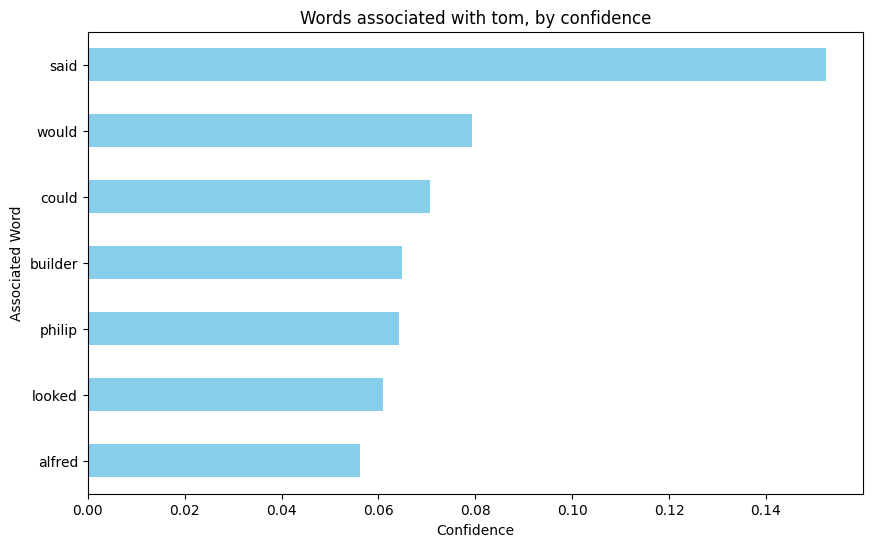

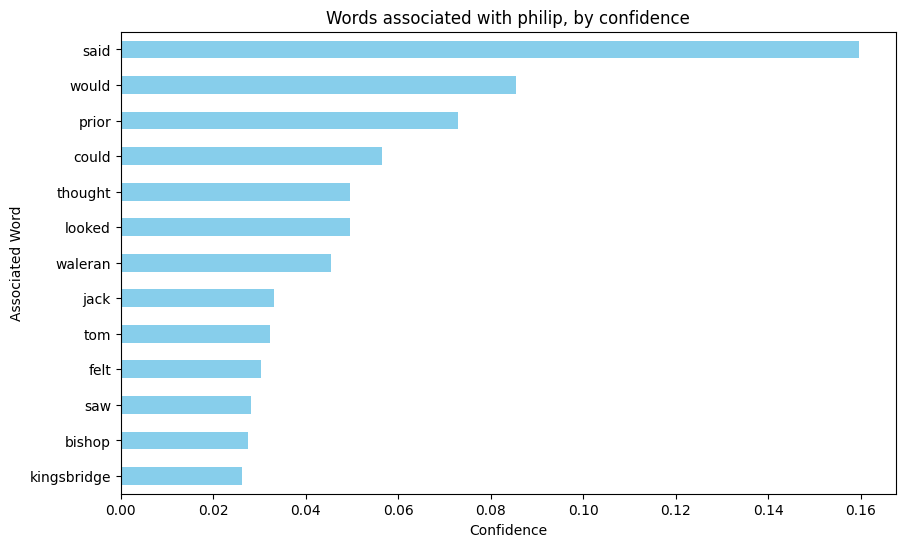

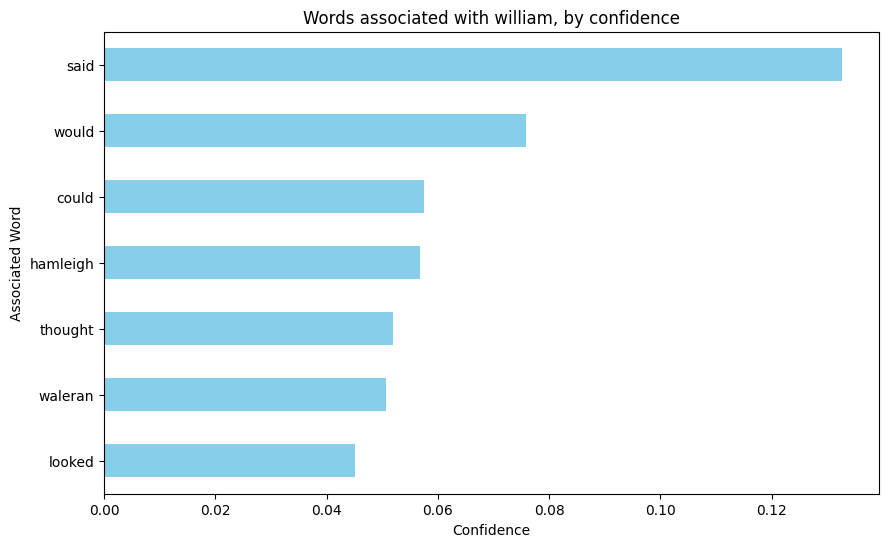

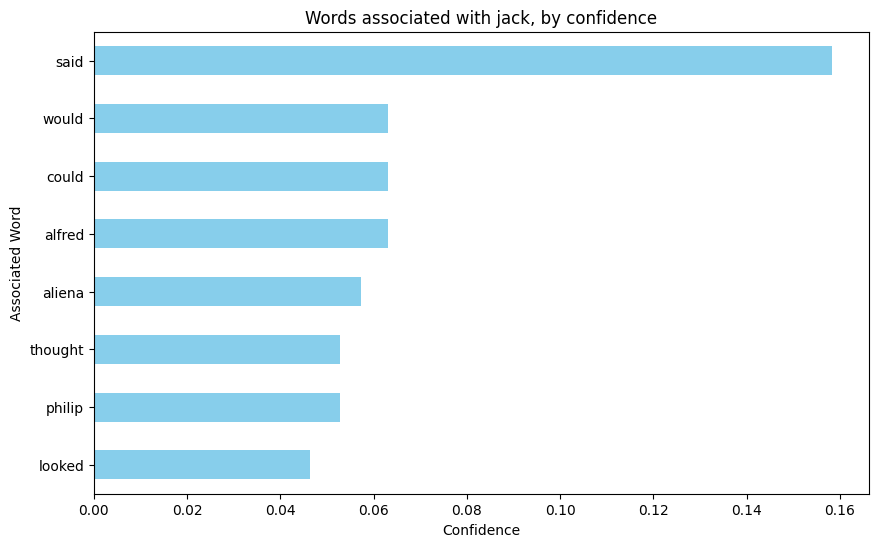

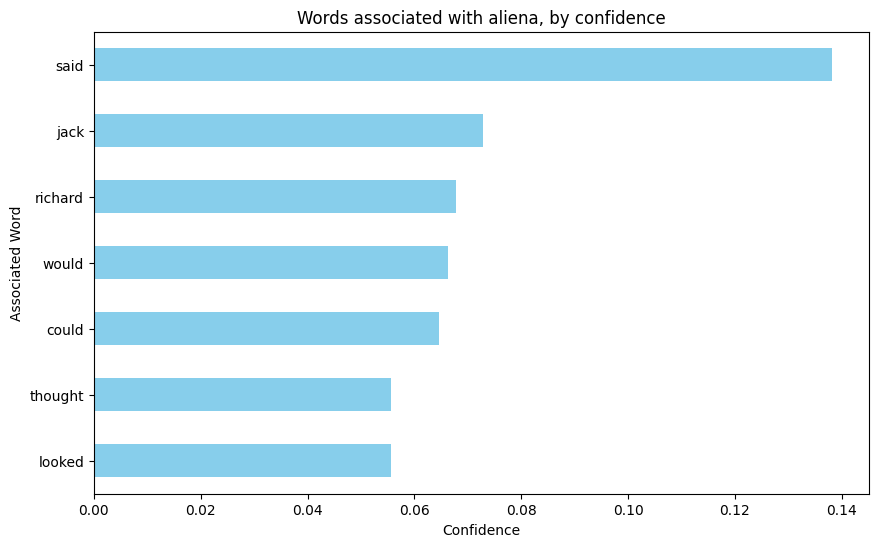

No numeric data to plot for target word: church


In [ ]:
import matplotlib.pyplot as plt

# Loop over each target word
for target_word in target_words:
    # Extract data for the current target word
    sub_df = df_results[[f'{target_word}_word', f'{target_word}_confidence']].dropna()

    # If no numeric data to plot, skip this target word
    if sub_df[f'{target_word}_confidence'].empty or not pd.api.types.is_numeric_dtype(sub_df[f'{target_word}_confidence']):
        print(f"No numeric data to plot for target word: {target_word}")
        continue
    
    # Set index and sort values
    sub_df.set_index(f'{target_word}_word', inplace=True)
    sub_df.sort_values(by=f'{target_word}_confidence', ascending=True, inplace=True)
    
    # Plot
    plt.figure(figsize=(10,6))
    sub_df[f'{target_word}_confidence'].plot(kind='barh', color='skyblue')
    plt.title(f'Words associated with {target_word}, by confidence')
    plt.xlabel('Confidence')
    plt.ylabel('Associated Word')
    plt.show()
